In [33]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import datetime
import os 
from matplotlib import pyplot as plt
import random
import dask.dataframe as dd
from sklearn import preprocessing


# Import Datatset


In [97]:
# import and drop column[0]
sample_df = pd.read_csv("/Volumes/HD David/COSC490/Clean_Data/final_sample.csv",parse_dates=['date'])
sample_df = sample_df.drop(columns = ['Unnamed: 0'])


In [99]:
sample_df.set_index('date',inplace = True)

In [103]:
sample_df.index

DatetimeIndex(['2016-09-10', '2016-09-10', '2016-09-10', '2016-09-10',
               '2016-09-10', '2015-07-15', '2015-07-15', '2015-07-15',
               '2015-07-15', '2014-11-01',
               ...
               '2017-08-11', '2017-08-12', '2017-08-12', '2017-08-12',
               '2017-08-11', '2017-08-09', '2017-08-04', '2017-08-11',
               '2017-08-11', '2017-08-06'],
              dtype='datetime64[ns]', name='date', length=12528269, freq=None)

Feature Engineering 

In [108]:
# adding columns for day and week 

sample_df['week'] = sample_df.index.week
sample_df['day'] = sample_df.index.day
sample_df['month'] = sample_df.index.month



<ipython-input-108-3d054628f341>:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sample_df['week'] = sample_df.index.week


In [109]:
sample_df

,id,store_nbr,item_nbr,unit_sales,onpromotion,transactions,oil_price,family,perishable,holiday,family_cat,week,day,month
date,,,,,,,,,,,,,,
2016-09-10,90594681,36,1165988,1.0,0,1320,45.315,GROCERY I,0,0.0,12,36,10,9
2016-09-10,90536016,2,1165988,4.0,0,2184,45.315,GROCERY I,0,0.0,12,36,10,9
2016-09-10,90558004,12,1165988,4.0,0,1308,45.315,GROCERY I,0,0.0,12,36,10,9
2016-09-10,90593142,35,1165988,5.0,0,760,45.315,GROCERY I,0,0.0,12,36,10,9
2016-09-10,90598928,38,1165988,7.0,0,1770,45.315,GROCERY I,0,0.0,12,36,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-09,124856524,45,2123036,1.0,0,3631,49.590,BEVERAGES,0,0.0,3,32,9,8
2017-08-04,124327997,45,2123036,1.0,0,4132,49.570,BEVERAGES,0,0.0,3,31,4,8
2017-08-11,125055751,44,2123747,1.0,0,4418,48.810,GROCERY I,0,0.0,12,32,11,8


In [111]:
df_month = sample_df.resample("M").sum()



KeyboardInterrupt: 

In [ ]:
df_month

Train/ Test split 

In [83]:
#using sklearn to split test/train 
from sklearn.model_selection import train_test_split


training_data, testing_data = train_test_split(sample_df, test_size=0.2, random_state=100)




In [36]:

model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
#

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

<AxesSubplot:xlabel='date', ylabel='unit_sales'>

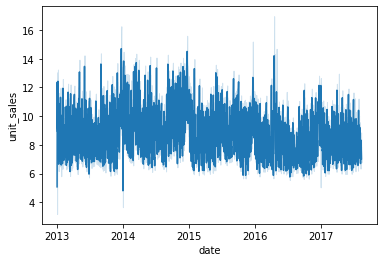

In [92]:

sns.lineplot(x = 'date', y = 'unit_sales',data = sample_df)